<a href="https://colab.research.google.com/github/Yashomoulik/HandsOn-6/blob/main/HandsOn_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) **Implementing two versions of QuickSort:**

Non-Random Pivot QuickSort: Choose the first element as the pivot.

Random Pivot QuickSort: Randomly select a pivot element from the array.



In [5]:
import random
import time
import matplotlib.pyplot as plt
import sys

def quicksort_non_random(arr):
    if len(arr) <= 1:
        return arr
    pivot_index = random.randint(0, len(arr) - 1)
    pivot = arr[pivot_index]
    less = [x for x in arr[:pivot_index] + arr[pivot_index+1:] if x <= pivot]
    greater = [x for x in arr[:pivot_index] + arr[pivot_index+1:] if x > pivot]

    return quicksort_non_random(less) + [pivot] + quicksort_non_random(greater)

def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_random(less) + equal + quicksort_random(greater)


2.) Now for Benchmarking :

2a)Best case

2b)Worst case

2c)Average case

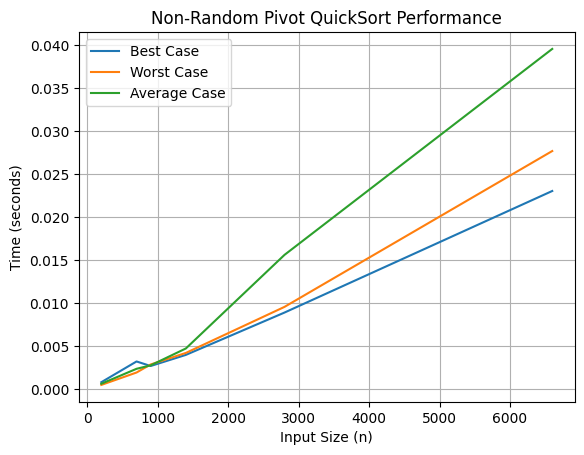

In [6]:
import numpy as np

def benchmark_quicksort(quicksort_fn, input_generator, n_values):
    times = []
    for n in n_values:
        arr = input_generator(n)
        start = time.time()
        quicksort_fn(arr)
        end = time.time()
        times.append(end - start)
    return times

# Best case (sorted array)
def best_case_input(n):
    return list(range(n))

# Worst case (reverse sorted array)
def worst_case_input(n):
    return list(range(n, 0, -1))

# Average case (random array)
def average_case_input(n):
    return list(np.random.randint(0, n, size=n))

# Benchmark non-random pivot QuickSort for different cases
n_values = [200, 700, 900, 1400, 2800, 6600]

best_case_times = benchmark_quicksort(quicksort_non_random, best_case_input, n_values)
worst_case_times = benchmark_quicksort(quicksort_non_random, worst_case_input, n_values)
average_case_times = benchmark_quicksort(quicksort_non_random, average_case_input, n_values)

# Plot the results
plt.plot(n_values, best_case_times, label="Best Case")
plt.plot(n_values, worst_case_times, label="Worst Case")
plt.plot(n_values, average_case_times, label="Average Case")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Non-Random Pivot QuickSort Performance")
plt.legend()
plt.grid(True)
plt.show()

3) **Mathematically deriving the average runtime complexity of the non-random pivot version of quicksort.**

Time complexity analysis interpretation

The complexity of running the QuickSort algorithm might also be inspired by how well the array gets separated by the selected pivot on each and every step.

Best Case Scenario:

In this case, the successive halves of the array turn out symmetric, causing the complexity O( n log n ) in the performance of the algorithm.

Worst Case Scenario:

In this case the array of elements is split in such a way that one half contains all the elements while the other half is empty, causing the complexity O( n 2 ).

For an average case analysis of QuickSort:

Next comes a stage where the array is split in two sub-arrays with some number of elements and the rest, i.e. 𝑛−%i elements, sit in the second sub-array where %i is the fraction of 𝑛 .

The number of comparisons in the average is better described with the formula:

T(n) = n + 1 1/n ( (n−1)∑i=0T(i) + T(n−1−i))

The above recurrence results in an average case complexity of the order of log n.

In the average case, since the partition is often such that the values of the slides are more closely placed to the means, hence the expectation need to is O ( n log ⁡ n ) .